David Garza Safi


## Regresión lineal múltiple
 



Después de haber trabajado con la regresión lineal simple, es momento de tomar un reto mayor,
pero a la vez, mucho más adecuado para problemas reales: la regresión lineal múltiple. En esta
ocasión practicarás con una base de datos de la NASA, con la que trabajaron para tratar de
determinar perfiles aerodinámicos ideales ante distintas condiciones, como: la velocidad del
viento y ángulo de ataque del mismo.


Utilizaremos el archivo de nombre “A1.3 NASA.csv”, donde podrás encontrar información para
1,052 observaciones distintas, con 6 mediciones para cada una de ellas. Los datos se
descargaron del UCI Machine Learning Repository, y originalmente se publicaron en el NASA
Reference Publication 1218.


La base de datos cuenta con la siguiente información:
- “frecuencia”. Frecuencia, en Hz.
- “angulo”. Ángulo de ataque, en grados.
- “longitud”. Longitud de cuerda geométrica, en metros.
- “velocidad”. Velocidad de flujo libre, en metros por segundo.
- “espesor”. Espesor del desplazamiento en el lado de succión, en metros.
- “presion”. Nivel escalado de presión sonora, en dB.

Objetivo: 
    ll




#### 1. Importacion los datos del archivo “NASA.csv” al ambiente de trabajo. 


In [4]:
# Importa la librería pandas
import pandas as pd
# Lee el archivo
nasa = pd.read_csv("NASA.csv")
# Imprime en consola las dimensiones de los datos
print("Dimensiones de los datos: ")
print(nasa.shape)
print("\n")
# Imprime en consola los nombres de las variables
print("Nombres de las variables: ")
print(nasa.columns)
print("\n")
# Imprime en consola los primeros 15 registros
print("Primeros 15 registros: ")
print(nasa.head(15))
print("\n")

Dimensiones de los datos: 
(1503, 6)


Nombres de las variables: 
Index(['frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor', 'presion'], dtype='object')


Primeros 15 registros: 
    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  11

#### 2. Se hace una separacion en el data frame en datos de entrenamiento y datos de prueba con una proporción 70/30. Es decir, el 70% de los datos se usarán para entrenar el modelo y el resto para validar sus resultados. Asegúrate que la partición sea aleatoria, no es una buena práctica simplemente tomar las primeras observaciones para entrenar y las últimas para probar. 

In [12]:
# Importa la función train_test_split
from sklearn.model_selection import train_test_split
# Genera los datos de entrenamiento y validación
train, test = train_test_split(nasa, train_size = 0.7)


# Imprime dimensiones de datos de entrenamiento
print("Dimensiones de los datos de entrenamiento: ")
print("Train:", train.shape)
print("\n")
# Imprime dimensiones de datos de prueba
print("Dimensiones de los datos de prueba: ")
print("Test:",test.shape)
print("\n")
#Imprime datos totales
print("Datos totales: ", nasa.shape[0])
print("\n")

Dimensiones de los datos de entrenamiento: 
Train: (1052, 6)


Dimensiones de los datos de prueba: 
Test: (451, 6)


Datos totales:  1503




#### 3. Entreno un modelo de regresión lineal múltiple, para que las primeras 5 variables del sistema intenten predecir a la sexta, “presion”. Es decir, nos interesa tratar de predecir el aerodinamismo, medido como la presión sonora detectada. 

In [37]:

# Importar librería
import statsmodels.api as sm
# Generar elemento X validacion
Xval = train.drop('presion', axis = 1)
# Generar elemento Y validacion
Yval = train.presion
# Definir el tipo de modelo
model = sm.OLS(Yval,sm.add_constant(Xval))
#Ajustar el modelo para obtener resultados
results = model.fit()
#Imprimir un resumen de los resultados
print(results.summary())
print("\n")
print("P-Values completos: ")

#Usa notación científica con 10 decimales
print(results.pvalues.apply(lambda x: f"{x:.10e}"))

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     214.7
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.29e-157
Time:                        22:49:30   Log-Likelihood:                -3147.3
No. Observations:                1052   AIC:                             6307.
Df Residuals:                    1046   BIC:                             6336.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.7444      0.645    205.660      0.0

#### 4. A partir de los resultados mostrados en la tabla, se analiza si existe al menos una variable significativa en el modelo. 

In [46]:
# Afirmación 1: Existencia de al menos una variable significativa
print("Existe al menos una variable significativa en el modelo, ya que todas las variables tienen p-values extremadamente pequeños (menores a 0.05), lo que indica que al menos una de ellas tiene una asociación lineal significativa con la salida.")

# Afirmación 2: Variables con asociación lineal significativa
print("Las variables frecuencia, ángulo, longitud, velocidad y espesor tienen una asociación lineal significativa con la salida, dado que sus p-values son menores a 0.05. Esto sugiere que contribuyen significativamente al modelo.")

# Afirmación 3: Variable más importante del modelo
print("La variable 'frecuencia' parece ser la más importante en el modelo, ya que tiene el p-value más pequeño (2.868e-107), lo que indica una asociación altamente significativa con la salida.")


Existe al menos una variable significativa en el modelo, ya que todas las variables tienen p-values extremadamente pequeños (menores a 0.05), lo que indica que al menos una de ellas tiene una asociación lineal significativa con la salida.
Las variables frecuencia, ángulo, longitud, velocidad y espesor tienen una asociación lineal significativa con la salida, dado que sus p-values son menores a 0.05. Esto sugiere que contribuyen significativamente al modelo.
La variable 'frecuencia' parece ser la más importante en el modelo, ya que tiene el p-value más pequeño (2.868e-107), lo que indica una asociación altamente significativa con la salida.


Con base en los p-values obtenidos, podemos hacer las siguientes afirmaciones sobre la significancia de las variables en el modelo:

Se puede afirmar que hay al menos una varibale significativa en el modelo. Usualmente un P-value menor **0.05** indica que la variable tiene un impacto significativo en la prediccion. Como se puede observar en los P-values obtenido, **todos** son mucho menores a **0.05**, lo que sugiere que son relevantes para el modelo. La variable **frecuencia** parece ser la más importante en el modelo, ya que tiene el p-value más pequeño (2.868e-107), lo que indica una asociación altamente significativa con la salida al igual marcandola la mas influyente.

#### 5. Se calcula el residual standard error y la $ 𝑅^2 $ del modelo, tanto para los datos de **entrenamiento** como para los datos de **validación** e imprime dichos valores en la consola. 





In [42]:
import scipy.stats as st
import numpy as np

# ==================== MÉTRICAS PARA DATOS DE ENTRENAMIENTO ====================
# Residual Standard Error (RSE) - Entrenamiento
RSE_train = np.sqrt(results.scale)  # 'scale' ya es el RSS/n-m-1, solo sacamos raíz

# R^2 - Entrenamiento
R2_train = results.rsquared  # Se obtiene directamente con statsmodels

# Imprimir resultados de entrenamiento
print("Datos de Entrenamiento:")
print(f"Residual Standard Error (RSE): ", RSE_train)
print(f"R^2: ", R2_train), print("\n")


# ==================== MÉTRICAS PARA DATOS DE VALIDACIÓN ====================


# Define Xval y Yval para los datos de validación los cuales se son de la anterior división
Xval = nasa.drop('presion', axis=1)
# Estima los valores de Y para los datos de validación
yhat_val = results.predict(sm.add_constant(Xval))

# Calcula el RSS de validación
RSS_val = sum((Yval - yhat_val) ** 2)

# Calcula el TSS de validación
TSS_val = sum((Yval - np.mean(Yval)) ** 2)

# Define el valor de n y m para los datos de validación
n_val = Xval.shape[0]  # Número de muestras
m_val = Xval.shape[1]  # Número de predictores

# Calcula el RSE de validación
RSE_val = np.sqrt(RSS_val / (n_val - m_val - 1))

# Calcula el R^2 de validación
R2_val = 1 - RSS_val / TSS_val

# Imprimir resultados de validación
print("Datos de Validación:")
print(f"Residual Standard Error (RSE):", RSE_val)
print(f"R^2: ", R2_val)


Datos de Entrenamiento:
Residual Standard Error (RSE):  4.8338739339903265
R^2:  0.5064837680282379


Datos de Validación:
Residual Standard Error (RSE): nan
R^2:  nan


#### 6. Finalmente, se visualizan los resultados obtenidos. Generando una gráfica de dispersión que cuente con el valor real de Y (la presión sonora) para el conjunto de datos de validación en el eje x, y que cuente con el valor estimado de Y, de acuerdo al modelo, para el mismo conjunto de datos en el eje y. Idealmente, si el modelo fuera perfecto, se tendría una línea recta con una pendiente de 1 (45 grados), pues el valor real y el valor estimado serían idénticos. Esta es una manera cualitativa de evaluar la calidad de nuestro modelo, entre más se asemejen los puntos a una línea recta, mejor. Comenta sobre los resultados obtenidos

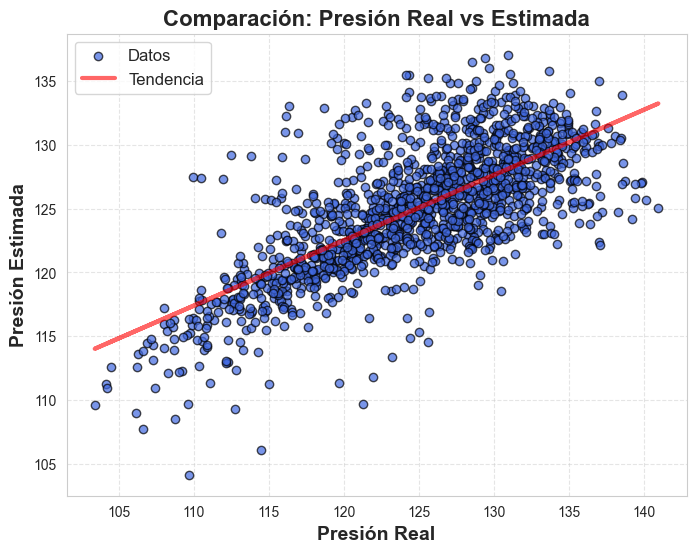

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar estilo de seaborn
sns.set_style("whitegrid")  

# Calcular la línea de tendencia
slope, intercept = np.polyfit(Y, yhat, 1)

# Crear la figura y el gráfico
plt.figure(figsize=(8,6))  # Ajustar tamaño de la gráfica
plt.scatter(Y, yhat, color="royalblue", alpha=0.7, edgecolors="black", label="Datos")  # Puntos con bordes
plt.plot(Y, slope*Y + intercept, color="red", linewidth=3, alpha=0.6, label="Tendencia")  # Línea de ajuste

# Mejorar etiquetas y título
plt.xlabel("Presión Real", fontsize=14, fontweight="bold")
plt.ylabel("Presión Estimada", fontsize=14, fontweight="bold")
plt.title("Comparación: Presión Real vs Estimada", fontsize=16, fontweight="bold")

# Agregar leyenda y cuadrícula suave
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar la gráfica
plt.show()

**Grafica 1: Presion Real vs Estimada**

En la siguiente grafica se puede ver la relacion entre la Presion Estimada (Y) y la Presion Real (X) de los datos proporcionados. Se puede ver como la linea de tendencia se ajusta a los datos, lo que indica que la relacion entre las variables es lineal. Aunque no fuera una pendiente ideal el modelo muestra una buena cantidad de certeza. 

lll